In [9]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import plotly.express as px

import os
import sys

from scipy.optimize import minimize
# code to manage where are lunch the file
if str(os.getcwd()).split("/")[-1] == "notebooks":
    sys.path.insert(1, os.path.realpath(os.path.pardir))
    path_b = "../"
else:
    path_b ='./'
import config as c

In [2]:
windows = c.windows
number_crypto = c.number_cyptos
market_cap = c.market_cap

df_name_index = pd.read_csv(f"{path_b}data/processed/first_{number_crypto}_crypto_list.csv", index_col=0)
df = pd.read_csv(f"{path_b}data/processed/market_cap_crypto.csv", index_col=0)

df_close_price = pd.read_csv(f'{path_b}data/processed/close_price_crypto.csv', index_col=0)
df_close_price['date'] = pd.to_datetime(df_close_price.index)
df_close_price['date'] = df_close_price['date'].dt.date
df_close_price.index = df_close_price['date']
del df_close_price['date']

## use market cap file

df_market_cap = pd.read_csv(f'{path_b}data/processed/crypto_date_marketcap_1mio_sorted.csv', index_col=0)


df_market_cap_first_20 = df_market_cap.iloc[:number_crypto]

#select last date
first_date = df_market_cap_first_20['first_date_marketcap_1mio'].tail(1).values

first_date_final = pd.to_datetime(first_date[0])

df_final_data = df_close_price.drop(df_close_price[df_close_price.index < first_date_final].index)
df_final_data = df_final_data[df_market_cap_first_20['crypto_name']]
df_final_data_return = np.log(df_final_data/df_final_data.shift(1)).dropna()

/Users/guillaume/MyProjects/HECProject/qarm_2/project/venv/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [29]:
df_weigths = df_final_data_return.applymap(lambda x: 1/number_crypto) #
port_equal_weigthed = np.sum(np.multiply(df_final_data_return, df_weigths),1)[2:]
#bug avec ces deux dates
port_equal_weigthed = port_equal_weigthed.drop(port_equal_weigthed[port_equal_weigthed.index == pd.to_datetime("2018-05-09") ].index)
port_equal_weigthed = port_equal_weigthed.drop(port_equal_weigthed[port_equal_weigthed.index == pd.to_datetime("2018-05-10") ].index)

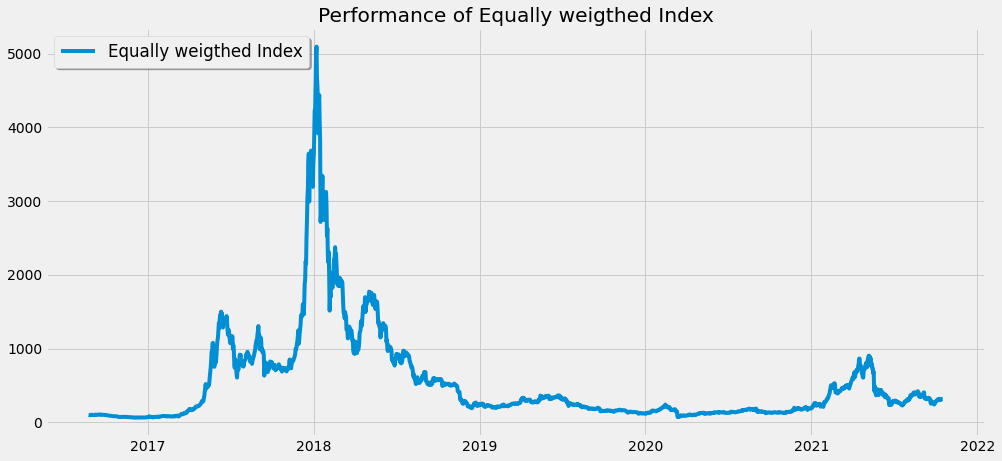

In [30]:
plt.figure(figsize=(15,7))
plt.plot((port_equal_weigthed+1).cumprod()*100)
plt.legend(['Equally weigthed Index'],loc='upper left',fontsize='large',fancybox=True, shadow=True)
plt.title('Performance of Equally weigthed Index')
plt.show()

# Debug pour les dates

In [20]:
df_test = pd.DataFrame((port_equal_weigthed+1).cumprod())
df_test.columns = ['cum_perf']
# df_test
df_test.drop(df_test[df_test.cum_perf == -np.inf ].index)

,cum_perf
date,
2016-08-23,0.983812
2016-08-24,0.977921
2016-08-25,0.967125
2016-08-26,0.982325
2016-08-27,0.964678
...,...
2018-05-04,17.544002
2018-05-05,17.589837
2018-05-06,17.072759


In [28]:
port_equal_weigthed.drop(port_equal_weigthed[port_equal_weigthed.index < pd.to_datetime("2018-05-06") ].index)

date
2018-05-06   -0.029396
2018-05-07   -0.038186
2018-05-08    0.069564
2018-05-09        -inf
2018-05-10         inf
                ...   
2021-10-13    0.027282
2021-10-14    0.014775
2021-10-15    0.010418
2021-10-16   -0.001320
2021-10-17    0.001856
Length: 1261, dtype: float64

In [18]:
(port_equal_weigthed+1).cumprod()

date
2016-08-23    0.983812
2016-08-24    0.977921
2016-08-25    0.967125
2016-08-26    0.982325
2016-08-27    0.964678
                ...   
2021-10-13        -inf
2021-10-14        -inf
2021-10-15        -inf
2021-10-16        -inf
2021-10-17        -inf
Length: 1882, dtype: float64